In [1]:
from scipy.signal import hilbert
import math
from scipy.fft import fft
from scipy.signal import unit_impulse as imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emd
from fdm import fdm

In [2]:
data = pd.read_csv('mitbih_train.csv',header = None)
data = np.array(data)
labels = data[:,-1]
data = data[:,0:-1]

In [3]:
def get_samples(data):
    def remove_padding(data):
        end = len(data)-1
        while data[end]==0:
            end=end-1
        return data[:end]
    samples = []
    for i in range(len(data)):
        samples.append(remove_padding(data[i]))
    samples = np.array([np.array(xi) for xi in samples])
    return samples
sample = get_samples(data)

C:\Users\Prafful\AppData\Local\Temp\ipykernel_3892\1299854655.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array([np.array(xi) for xi in samples])


In [4]:
len(sample)

87554

In [5]:
labelwise_data = [[],[],[],[],[]]
for i in range(0,len(sample)):
    val = labels[i]
    val = int(val)
    labelwise_data[val].append(sample[i])
len(labelwise_data[3])

641

In [6]:
curr = 3
label_data = labelwise_data[curr]
len(label_data)

641

In [7]:
len(label_data[0])

79

In [8]:
def phase_shift(samples,alpha):
    shifted = []
    samples = np.array(samples)
    for data in samples:
        transformed = hilbert(data)
        for val in alpha:
            temp = data*math.cos(val) + transformed*math.sin(val)
            shifted.append(np.array(temp.real))
    return np.array(shifted)

In [9]:
label_length = [len(labelwise_data[0]),len(labelwise_data[1]),len(labelwise_data[2]),len(labelwise_data[3]),len(labelwise_data[4])]
label_length

[72471, 2223, 5788, 641, 6431]

In [10]:
fs = 125
def get_imfs(samples):
    length = len(samples)
    imfs = []
    for i in range(length):
        imfs.append(emd.sift.sift(samples[i]))
    imfs = np.array(imfs)
    return imfs

maximum=186
        
def create_spectrum(fibfs):
    sample_rate = 125
    f=0
    hht=0
    f_arr = []
    hht_arr = []
    for i in range(0,len(fibfs),1):
        IP, IF, IA = emd.spectra.frequency_transform(fibfs[i],sample_rate,'hilbert')
        freq_range = (0.1,10,80,'log')
        f, hht = emd.spectra.hilberthuang(IF,IA,freq_range,sum_time=False)
        
        f_arr.append(np.asarray(f))
        
        
        if len(hht[0])<maximum :
            final_hht = []
            for a in range(0,len(hht),1):
                length = len(hht[0])
                temp = list(hht[a])
                for b in range(0,186-length,1):
                    temp.append(0)
                final_hht.append(temp)
            hht_arr.append(np.asarray(final_hht))
        
        else:
            hht_arr.append(hht)
            
            
    return np.asarray(f_arr),np.asarray(hht_arr)

In [11]:
new_sample_0 = np.array(labelwise_data[0][0:6500])
temp_label_0 = np.full(new_sample_0.shape[0],0)
## for label 1:
temp1 = np.array(labelwise_data[1][0:2223])
temp2 = phase_shift(labelwise_data[1][0:2139],alpha = [math.pi/3,math.pi/6])
new_sample_1 = np.concatenate((temp1,temp2))
temp_label_1 = np.full(new_sample_1.shape[0],1)
## for label 2:
temp1 = np.array(labelwise_data[2][0:5788])
temp2 = phase_shift(labelwise_data[2][0:356],alpha = [math.pi/3,math.pi/6])
new_sample_2 = np.concatenate((temp1,temp2))
temp_label_2 = np.full(new_sample_2.shape[0],2)
## for label 3:
temp1 = np.array(labelwise_data[3][:])
temp2 = phase_shift(labelwise_data[3][:],alpha = [math.pi/3,math.pi/6,math.pi/8,math.pi/10,math.pi/12,math.pi/14,math.pi/16,math.pi/19,math.pi/20])
new_sample_3 = np.concatenate((temp1,temp2))
temp_label_3 = np.full(new_sample_3.shape[0],3)
## for label 4:
new_sample_4 = np.array(labelwise_data[4][:])
temp_label_4 = np.full(new_sample_4.shape[0],4)

temp_samples = np.concatenate((new_sample_0,new_sample_1,new_sample_2,new_sample_3,new_sample_4))
temp_labels = np.concatenate((temp_label_0,temp_label_1,temp_label_2,temp_label_3,temp_label_4))

C:\Users\Prafful\AppData\Local\Temp\ipykernel_3892\3316496239.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_sample_0 = np.array(labelwise_data[0][0:6500])
C:\Users\Prafful\AppData\Local\Temp\ipykernel_3892\3316496239.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp1 = np.array(labelwise_data[1][0:2223])
C:\Users\Prafful\AppData\Local\Temp\ipykernel_3892\4105871267.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes

In [12]:
temp_labels.shape

(32342,)

In [13]:
temp_samples.shape

(32342,)

In [14]:
idx = np.random.permutation(len(temp_samples))
shuffled_samples , training_labels = temp_samples[idx], temp_labels[idx]

In [15]:
features = get_imfs(shuffled_samples)

C:\Users\Prafful\AppData\Local\Temp\ipykernel_3892\1046651556.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imfs = np.array(imfs)


In [16]:
max_imfs = 0
for imf in features:
    (x,y) = imf.shape
    max_imfs = max(y,max_imfs)
def pad_imfs(imfs):
    final = []
    for imf in imfs:
        (x,y) = imf.shape
        if y<6:
            temp_imf = []
            for each_period in imf:
                temp_imf.append(np.pad(each_period,(0,6-y),'constant',constant_values=(0,0)))
            imf = np.array(temp_imf)
        
        if x<maximum :
            pading_log = np.zeros((maximum-x,6))
            final.append(np.concatenate((imf,pading_log)))
        else:
            final.append(imf)
    return np.array(final)
features = pad_imfs(features)

<AxesSubplot:xlabel='Time (samples)'>

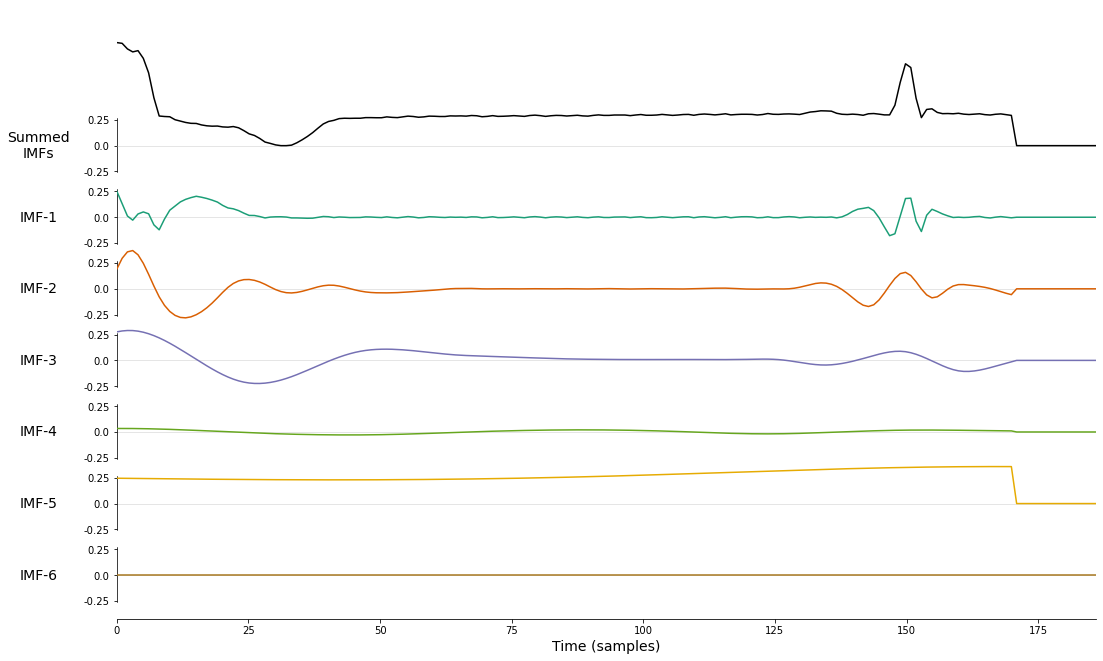

In [17]:
emd.plotting.plot_imfs(features[0])

# Learning Arena

In [18]:
def get_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(acc)+1)
    
    plt.plot(epochs,acc,'bo',label = 'Training acc')
    plt.plot(epochs,val_acc,'b',label = 'Validation acc')
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs,loss,'bo',label='Training Loss')
    plt.plot(epochs,val_loss,'b',label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()

In [19]:
from keras.utils import to_categorical
labels = to_categorical(training_labels)

In [20]:
from keras import layers,models

def get_model():
    input_seq = layers.Input(shape = (186,6))
    conv1 = layers.Conv1D(24,7,padding="same", activation="tanh")(input_seq)
    pool1 = layers.MaxPooling1D(5)(conv1)
    conv2 = layers.Conv1D(24,7,padding="same", activation="tanh")(pool1)
    processed = layers.GlobalMaxPooling1D()(conv2)
    compressed = layers.Dense(50, activation="relu")(processed)
    compressed = layers.Dropout(0.3)(compressed)
    out = layers.Dense(5, activation='softmax')(compressed)
    model = models.Model(inputs=input_seq, outputs=out)
    model.compile(optimizer = 'RMSprop',loss='kullback_leibler_divergence',metrics=['accuracy'])
    return model
##model_history = model.fit(features,labels,epochs=75,validation_split=0.2)

Epoch 1/50
809/809 [==============================] - 10s 11ms/step - loss: 0.9134 - accuracy: 0.6513 - val_loss: 0.5386 - val_accuracy: 0.8035
Epoch 2/50
809/809 [==============================] - 10s 12ms/step - loss: 0.4961 - accuracy: 0.8261 - val_loss: 0.4204 - val_accuracy: 0.8522
Epoch 3/50
809/809 [==============================] - 8s 10ms/step - loss: 0.3898 - accuracy: 0.8641 - val_loss: 0.3376 - val_accuracy: 0.8788
Epoch 4/50
809/809 [==============================] - 11s 14ms/step - loss: 0.3417 - accuracy: 0.8811 - val_loss: 0.3009 - val_accuracy: 0.8890
Epoch 5/50
809/809 [==============================] - 9s 11ms/step - loss: 0.3073 - accuracy: 0.8950 - val_loss: 0.2866 - val_accuracy: 0.9017
Epoch 6/50
809/809 [==============================] - 10s 12ms/step - loss: 0.2827 - accuracy: 0.9026 - val_loss: 0.2463 - val_accuracy: 0.9148
Epoch 7/50
809/809 [==============================] - 10s 12ms/step - loss: 0.2640 - accuracy: 0.9097 - val_loss: 0.2577 - val_accuracy: 0

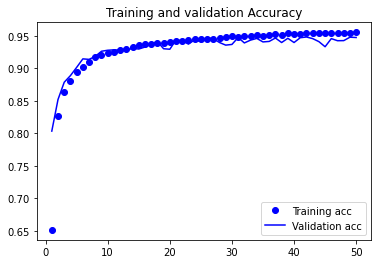

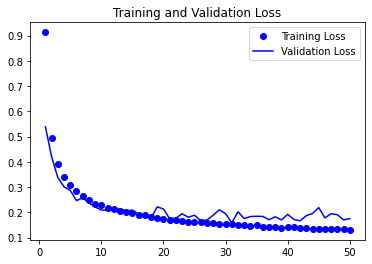

<Figure size 432x288 with 0 Axes>

In [22]:
temp_model = get_model()
history = temp_model.fit(features,labels,epochs=50,validation_split=0.2)
get_curves(history)

In [31]:
k=4
num_val_samples = len(features)//4
val_scores=[]
model=None
for fold in range(k):
    val_data = features[num_val_samples*fold:num_val_samples*(fold+1)]
    val_label = labels[num_val_samples*fold:num_val_samples*(fold+1)]
    train_data = np.concatenate((features[:num_val_samples*fold],features[num_val_samples*(fold+1):]))
    train_label = np.concatenate((labels[:num_val_samples*fold],labels[num_val_samples*(fold+1):]))
    model = get_model()
    model.fit(train_data,train_label,epochs=50)
    val_score = model.evaluate(val_data,val_label)
    val_scores.append(val_score)

Epoch 1/50
759/759 [==============================] - 3s 3ms/step - loss: 0.9207 - accuracy: 0.6481
Epoch 2/50
759/759 [==============================] - 2s 3ms/step - loss: 0.4902 - accuracy: 0.8276
Epoch 3/50
759/759 [==============================] - 3s 3ms/step - loss: 0.3804 - accuracy: 0.8687
Epoch 4/50
759/759 [==============================] - 2s 3ms/step - loss: 0.3288 - accuracy: 0.8863
Epoch 5/50
759/759 [==============================] - 3s 4ms/step - loss: 0.2974 - accuracy: 0.8981
Epoch 6/50
759/759 [==============================] - 2s 3ms/step - loss: 0.2751 - accuracy: 0.9072
Epoch 7/50
759/759 [==============================] - 2s 3ms/step - loss: 0.2585 - accuracy: 0.9113
Epoch 8/50
759/759 [==============================] - 3s 3ms/step - loss: 0.2469 - accuracy: 0.9145
Epoch 9/50
759/759 [==============================] - 3s 3ms/step - loss: 0.2325 - accuracy: 0.9199
Epoch 10/50
759/759 [==============================] - 3s 3ms/step - loss: 0.2250 - accuracy: 0.9226

In [32]:
val_scores

[[0.17535783350467682, 0.9459493160247803],
 [0.22964201867580414, 0.9397649765014648],
 [0.19044803082942963, 0.9418676495552063],
 [0.1702313870191574, 0.9485467076301575]]

In [33]:
val_scores = np.array(val_scores)
sum(val_scores)/len(val_scores)

array([0.19141982, 0.94403216])

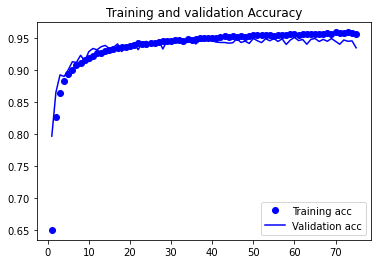

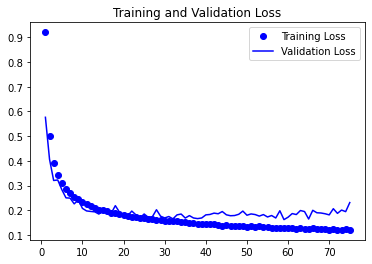

<Figure size 432x288 with 0 Axes>

In [26]:
get_curves(model_history)

In [25]:
test_data = pd.read_csv('mitbih_test.csv',header = None)
test_data = np.array(test_data)
test_labels = test_data[:,-1]
test_data = test_data[:,:-1]
test_data.shape

(21892, 187)

In [26]:
temp0 = get_samples(test_data)
test_imfs = get_imfs(temp0)

C:\Users\Prafful\AppData\Local\Temp\ipykernel_15640\1299854655.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array([np.array(xi) for xi in samples])
C:\Users\Prafful\AppData\Local\Temp\ipykernel_15640\1046651556.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imfs = np.array(imfs)


In [27]:
test_imfs.shape

(21892,)

In [28]:
final_features = pad_imfs(test_imfs)
final_target = to_categorical(test_labels)

In [29]:
(final_features.shape,final_target.shape)

((21892, 186, 6), (21892, 5))

In [34]:
model.evaluate(final_features,final_target)

685/685 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9306


[0.26955801248550415, 0.9305682182312012]